In [28]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [29]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
sse=np.array([])
for i in range(2,math.floor(len(df['petal width (cm)'])**0.5)):
    model=KMeans(n_clusters=i)
    model.fit(df)
    sse=np.append(sse,model.inertia_)
sse
    

/home/siva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/siva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/siva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/siva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/siva/.local/lib/python3.10/site-pa

array([152.34795176,  78.85144143,  57.25600932,  46.44618205,
        39.06603535,  34.70370116,  30.35129531,  27.81271674,
        26.32407226,  24.8111123 ])

In [32]:
sse_dict={x:y for x,y in enumerate(sse)}
sse_dict

{0: 152.34795176035794,
 1: 78.85144142614601,
 2: 57.25600931571815,
 3: 46.44618205128205,
 4: 39.066035353535355,
 5: 34.70370115753811,
 6: 30.351295313382266,
 7: 27.81271673501937,
 8: 26.32407226399332,
 9: 24.811112296200537}

<Axes: >

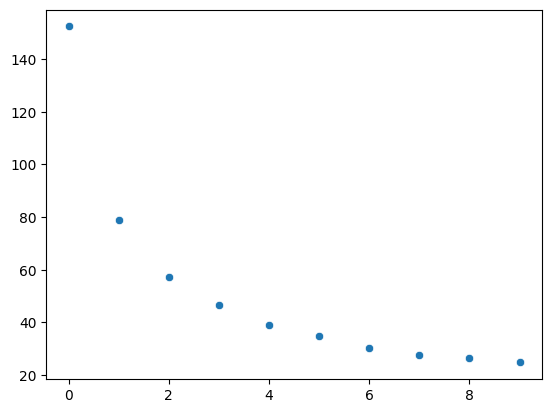

In [33]:
sns.scatterplot(x=sse_dict.keys(),y=sse_dict.values())

### the elbow method fails to give the correct number of clusters but since the number of classifications is already known it doesn't cause much issue wrt this problem

In [34]:
model=KMeans(n_clusters=3)
model.fit(df)

/home/siva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
df['predicted_clusters']=model.labels_
df['true_clusters']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted_clusters,true_clusters
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

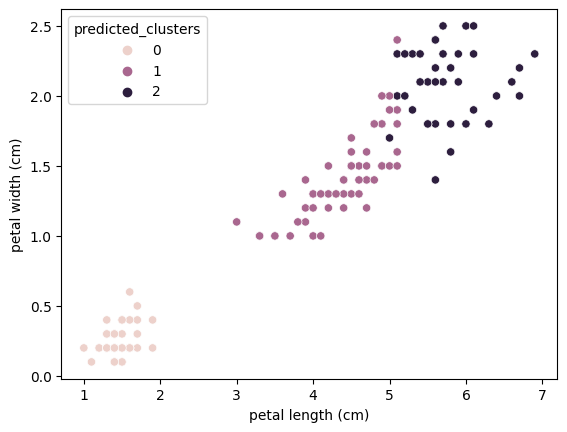

In [41]:
sns.scatterplot(x='petal length (cm)',\
                y='petal width (cm)',data=df,\
                hue='predicted_clusters')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

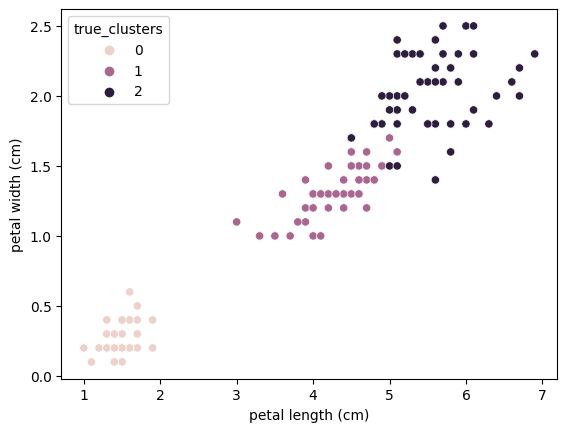

In [40]:
sns.scatterplot(x='petal length (cm)',\
                y='petal width (cm)',data=df,\
                hue='true_clusters')